# 프로젝트: 다양한 OCR모델 비교하기

## Step1: 검증용 데이터셋 준비

In [1]:
import os
import matplotlib.pyplot as plt
import cv2

import keras_ocr

import pytesseract
from PIL import Image
from pytesseract import Output


data_path = os.getenv('HOME')+ '/aiffel/ocr_python/test_image'
data_path

'/aiffel/aiffel/ocr_python/test_image'

In [2]:

# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  './testimg1.png',
  './testimg2.png',
  './testimg3.png',
  './testimg4.png',
  './testimg5.png',
  './testimg6.png',
  './testimg7.png',   
  './testimg8.png',
  './testimg9.png',
  './testimg10.png',

]
file_list = os.listdir(data_path)
file_path = [data_path+'/'+name for name in file_list]
file_path = sorted(file_path)
file_path

['/aiffel/aiffel/ocr_python/test_image/testimg1.png',
 '/aiffel/aiffel/ocr_python/test_image/testimg10.png',
 '/aiffel/aiffel/ocr_python/test_image/testimg2.png',
 '/aiffel/aiffel/ocr_python/test_image/testimg3.png',
 '/aiffel/aiffel/ocr_python/test_image/testimg4.png',
 '/aiffel/aiffel/ocr_python/test_image/testimg5.png',
 '/aiffel/aiffel/ocr_python/test_image/testimg6.png',
 '/aiffel/aiffel/ocr_python/test_image/testimg7.png',
 '/aiffel/aiffel/ocr_python/test_image/testimg8.png',
 '/aiffel/aiffel/ocr_python/test_image/testimg9.png']

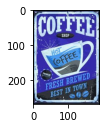

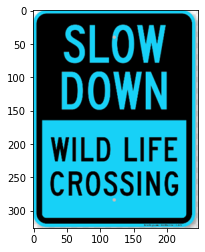

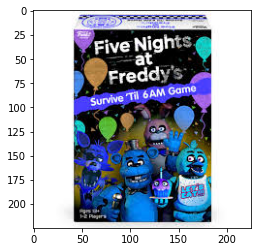

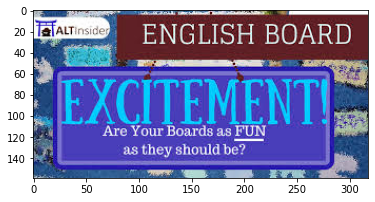

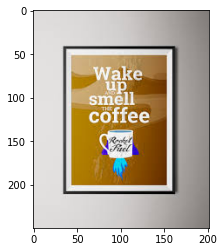

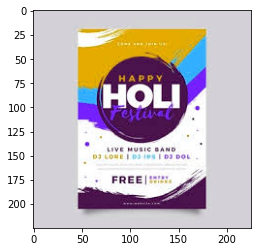

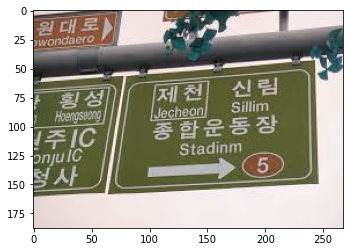

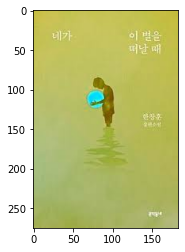

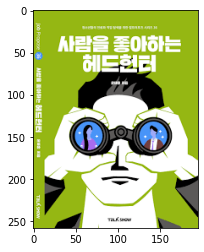

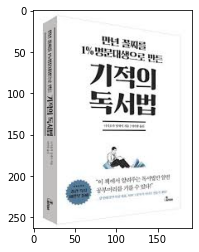

In [3]:

rows = 5
cols = 2
fig = plt.figure(figsize=(20,10))
for idx, path in enumerate(file_path, 1):
    ax = fig.add_subplot(rows, cols, idx)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    plt.imshow(img)
    
    plt.show()

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

### -  Google OCR API

In [4]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return texts[0].description

In [5]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

google_ocr_result = []
for path in file_path:
    print("*"*10)
    result = detect_text(path)
    google_ocr_result.extend(result)
    print("")

total 142856
-rw-r--r-- 1 root root    35353 Sep 16 20:21  2.png
drwxr-xr-x 2 root root     4096 Aug 13 01:42  activation
-rw-r--r-- 1 root root    87059 Aug  4 15:20  area_genre_popluraity.png
-rw-r--r-- 1 root root     4645 Aug 24 09:02  attention.py
-rw-r--r-- 1 root root    17214 Aug  4 15:16 'Average_visitors_by_holiday_&_non_holiday.png'
-rw-r--r-- 1 root root    12012 Aug  4 15:16  Average_visitors_by_next_day_holiday.png
-rw-r--r-- 1 root root    60437 Aug  4 15:15  Average_visitors_by_weekday_monthly_2016.png
-rw-r--r-- 1 root root    11770 Aug  4 15:16  Average_visitors_by_weekdays_weekends.png
-rw-r--r-- 1 root root     6937 Jul  6 23:54  barplot.png
drwxr-xr-x 4 root root     4096 Sep 13 13:08  bert_qna
drwxr-xr-x 3 root root     4096 Sep 10 07:02  bigdata_ecosystem
drwxr-xr-x 4 root root     4096 Jul 20 02:14  camera_sticker
drwxr-xr-x 2 root root     4096 Aug 26 00:45  chest_xray
drwxr-xr-x 5 root root     4096 Sep 23 13:54  conditional_generation
drwxr-xr-x 3 root root  

### - keras-ocr

In [6]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [7]:
images = [keras_ocr.tools.read(path) for path in file_path]
prediction_groups = [pipeline.recognize({path}) for path in file_path]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


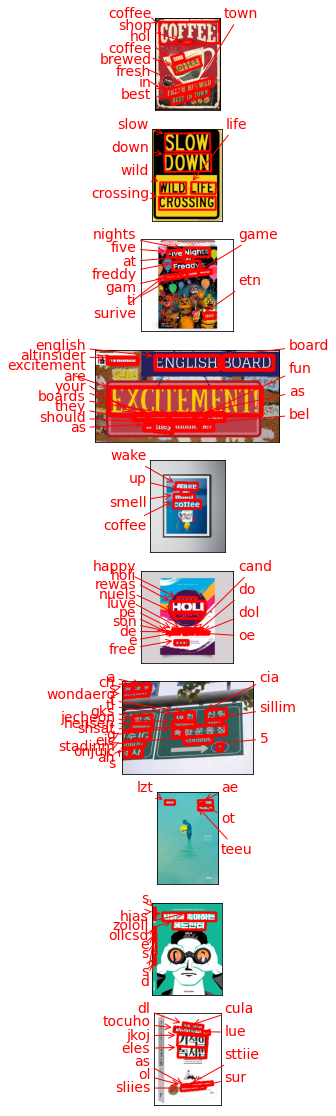

In [8]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### - Tesseract

In [9]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 영어라면 lang='eng', 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [27]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test_image'
img_file_path = work_dir + '/testimg3.png'   
# tesseract_result_path = []
# for path in file_path:
# image_path_list = crop_word_regions(path, work_dir)
# tesseract_result_path.extend(image_path_list)

In [28]:
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/test_image/0000.png
/aiffel/aiffel/ocr_python/test_image/0001.png
/aiffel/aiffel/ocr_python/test_image/0002.png
/aiffel/aiffel/ocr_python/test_image/0003.png
/aiffel/aiffel/ocr_python/test_image/0004.png
/aiffel/aiffel/ocr_python/test_image/0005.png
/aiffel/aiffel/ocr_python/test_image/0006.png
/aiffel/aiffel/ocr_python/test_image/0007.png
/aiffel/aiffel/ocr_python/test_image/0008.png
/aiffel/aiffel/ocr_python/test_image/0009.png


In [29]:
def recognize_images(cropped_image_path_list, lang='kor'):
    custom_oem_psm_config = r' --oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print('Done')
#     return recognized_data

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

ia

I Lis

tus

Zelthmsiee hn

oh:

2h aa

as they should

lal ow

SS ee

Blin

Done


## Step3. 테스트 결과 정리

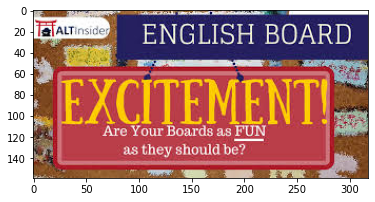

In [30]:
test_image_path = os.getenv('HOME')+'/aiffel/ocr_python/test_image/testimg3.png'
img_bgr = cv2.imread(test_image_path)    #- OpenCV로 이미지를 읽기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기
plt.imshow(img_rgb)
plt.show()

In [31]:
# Google OCR
detect_text(test_image_path)

Texts:

"lalALTinsider
ENGLISH BOARD
-EXCITEMENT!
Are Your Boards as FUN
as they should be?
"

"lalALTinsider"

"ENGLISH"

"BOARD"

"-EXCITEMENT!"

"Are"

"Your"

"Boards"

"as"

"FUN"

"as"

"they"

"should"

"be?"
bounds: (180,126),(200,126),(200,136),(180,136)


'lalALTinsider\nENGLISH BOARD\n-EXCITEMENT!\nAre Your Boards as FUN\nas they should be?\n'

In [32]:
# Tesseract
recognize_images(cropped_image_path_list)

ia

I Lis

tus

Zelthmsiee hn

oh:

2h aa

as they should

lal ow

SS ee

Blin

Done


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


<AxesSubplot:>

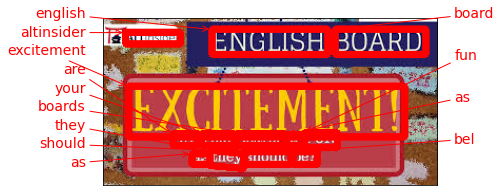

In [34]:
# Keras OCR
keras_ocr.tools.drawAnnotations(image=images[3], predictions=prediction_groups[3][0])

## Step4. 결과 분석 및 결론


책표지나 포스터를 읽는 모델을 생각했다.

- Google OCR 언어 설정없이도 인식이 가능했다.
- Tesseract 설정부분에서 좀 까다로웠고 언어를 따로 설정해야했으며 나같은 경우는 결과가 좋지 않았음.  
- keras-ocr 로케이션은 좋았고 문자 인식률도 좋았다.

영어와 한글이 혼재되어있는 데이터에 적합하며 인식률이 좋고 사용하기 편했던 Google OCR을
사용해야겠다.